## Problem Statement
- Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

- In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

- Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __Submission__

### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

- Train set has 245725 rows and 11 columns
- Test set has 105312 rows and 10 columns

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
#ratio of null values
train.isnull().sum()/train.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [7]:
#ratio of null values
test.isnull().sum()/test.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

- It seems there is almost 12% missing values in Credit_Product, Which indicates if the Customer has any active credit product (Home loan, Personal loan, Credit Card etc)

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


### Step 3: Data Cleaning

#### Missing value treatment strategies: At first let's understand what are the possilbe reasons of the missing values in this data. There are two possible scenarios here: 
- Some of the customers presently are not holding any active credit product. So, for such customers this feature is showing missing values.
- Also, there is a possibility that some customers are holding active credit product but not from this bank but from other baking partner. And this information is not shared by customers with 'Happy Customer Bank'. So, 'Happy Customer Bank' database is showing missing values for those set of customers.

#### Missing values treatment startegy:
As per my assumption, I will treat this particular set of customers as a separate group where the active credit product data is not available or not shared. So, for the feature 'Credit_Product', I will consider 3 groups : 
- customers who are having active credit product ('Yes')
- customers who are not having active credit product ('No')
- and finally those customers where this data is not avaialble ('Missing') 

In [10]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

* __Missing value imputation in both train and test__

In [12]:
# imputing the missing values from the column with 'Missing'
print('Before Imputation:', train['Credit_Product'].isnull().sum())
train['Credit_Product'].fillna('Missing', inplace=True)
print('After Imputation:', train['Credit_Product'].isnull().sum())

Before Imputation: 29325
After Imputation: 0


In [13]:
# imputing the missing values from the column with 'Missing'
print('Before Imputation:', test['Credit_Product'].isnull().sum())
test['Credit_Product'].fillna('Missing', inplace=True)
print('After Imputation:', test['Credit_Product'].isnull().sum())

Before Imputation: 12522
After Imputation: 0


### Step 4: Exploratory Data Analysis
##### Question that were asked and answered through visualizations here are as following:
- Q1. How the Vintage Scores across region look like?
- Q2. Is there any Relationship visible between Occupation and Is_Lead?
- Q3. Can Gender be a good feature in order to tell us if the customer is willing to take the recommended credit card or not?

##### Univariate Analysis:

In [14]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

<AxesSubplot:ylabel='Is_Lead'>

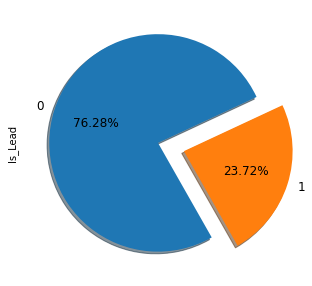

In [15]:
#Let's look at the proportion of the customers:
plt.figure(figsize=(5,5))
train.Is_Lead.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

Observation:
- It seems that out of the targetterd customers only 24% are interested to take the recommended credit card, whereas almost 76% are not.

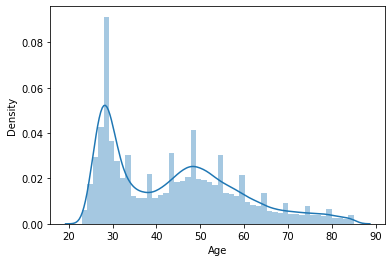

In [16]:
#Let's see how the distribtion of 'Age' data looks like for the traget customers:
sns.distplot(train['Age']);

Observations:
- 'Age' is having bi-modal distribution hereClearly there is a high spike at around 28-30
- Clearly there is a high spike at around 28-30. It means that most of the target cutomers are of age around 28 to 30
- Apart from that, there is a also moderate spike at the age around 47-49, which means people of this age are also appearing as potential customers
- There are very few customers are of age greater than 80, now this high age does not seem to be good age to invest in new banking product such as a credit card. Because of many reasons like - he/she may need it rarely in comparison to younger aged customers, at this high age one might have stable but low income, high amount purchases are rare so need of credit card may not apply.

<AxesSubplot:ylabel='Gender'>

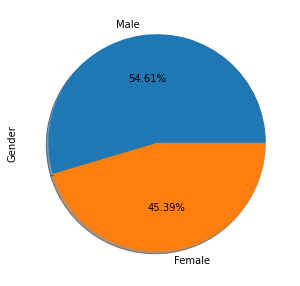

In [17]:
#Who are the target customers gender-wise
#Offered band
plt.figure(figsize=(5,5))
(train['Gender'].value_counts() * 100 / len(train)).plot.pie(autopct='%1.2f%%', shadow=True)

Observation:
- The target customer selection looks quite proportionate with respect to gender

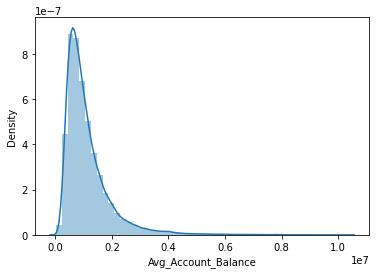

In [41]:
#Let's see how the distribtion of 'Avg_Account_Balance' data looks like for the traget customers:
sns.distplot(train['Avg_Account_Balance']);

Observation:
- As expected, the Avg_Account_Balance data distribution is right skewed. Most of the customers is having avg balance of around 1000k 

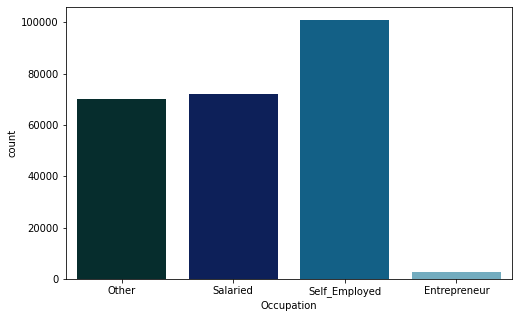

In [76]:
#Occupation
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='ocean');

#### Bivaraite Analysis:

1.__Vintage score vs Is_Lead:__

In [24]:
#Vintage score vs Is_Lead:

#Binning the Vintage score:
def new(r):
    if (0<= r['Vintage']<=20):
        return '0 to 20'
    if (20<r['Vintage']<=40):
        return '20 to 40'
    if (40<r['Vintage']<=60):
        return '40 to 60'
    if (60<r['Vintage']<=80):
        return '60 to 80'
    if (80<r['Vintage']<=100):
        return '80 to 100'
    if (100<r['Vintage']<=120):
        return '100 to 120'
    if (120<r['Vintage']):
        return '120+'
train['Vintage_new'] = train.apply(lambda x: new(x),axis = 1)

<AxesSubplot:xlabel='Vintage_new', ylabel='count'>

<Figure size 432x288 with 0 Axes>

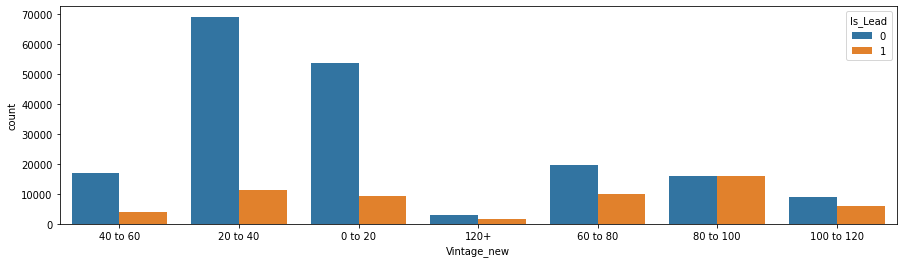

In [39]:
fig = plt.figure()
fig, plt.figure(figsize=(15,4))
sns.countplot(train['Vintage_new'], hue=train['Is_Lead'])

Obseravtions:
- Customers from different vintage scoring group are showing interest to invest in the recommended credit card. Though, it seems customers with high vintage score are showing compartively more interets than customers with less vinatge scoring

In [66]:
from scipy.stats import chi2_contingency
# Contingency Table 
tab = pd.crosstab(train['Vintage_new'], train['Is_Lead'])
chi2, p, dof, exp = chi2_contingency(tab)

#check the p-value of the test:
if p<0.05:
    print('Reject the Null hypothesis')
    print('There is a relation between Vintage_new & Is_Lead')
else:
    print('Do not reject the Null hypothesis')
    print('There is no relation between Vintage_new & Is_Lead')

Do not reject the Null hypothesis
There is no relation between Vintage_new & Is_Lead


2.__Avg_Account_Balance vs Is_Lead:__

Text(0.5, 1.0, 'Top 10 Regions')

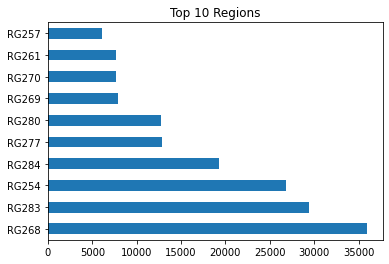

In [58]:
ax = train['Region_Code'].value_counts()[:10].plot(kind='barh')
ax.set_title('Top 10 Regions')

__Let's do chi2 test to establish the claim - Region_Code & Is_Lead may be related__

In [68]:
from scipy.stats import chi2_contingency
# Contingency Table 
tab = pd.crosstab(train['Region_Code'], train['Is_Lead'])
chi2, p, dof, exp = chi2_contingency(tab)

#check the p-value of the test:
if p<0.05:
    print('Reject the Null hypothesis')
    print('There is a relation between Region_Code & Is_Lead')
else:
    print('Do not reject the Null hypothesis')
    print('There is no relation between Region_Code & Is_Lead')

Reject the Null hypothesis
There is a relation between Region_Code & Is_Lead


__Can avg account balance be a good decisive factor to identify a poetential customer?__

In [71]:
train.groupby('Is_Lead').agg({'Avg_Account_Balance':'mean'})

,Avg_Account_Balance
Is_Lead,
0,1.103018e+06
1,1.210034e+06


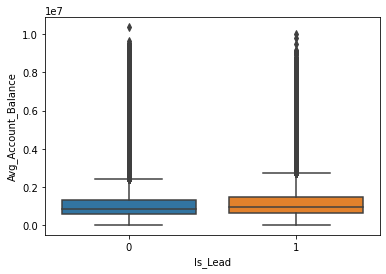

In [64]:
sns.boxplot(x="Is_Lead", y="Avg_Account_Balance", data=train);

Observation:
- It seems that interested customer's average account balance is higher that the customers who are not interested to invest in a credit card.
- So avg account balance may be a good factor to indetify potential customers

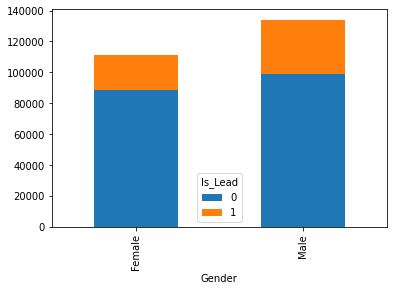

In [80]:
var = train.groupby(['Gender','Is_Lead']).Is_Lead.count()
var.unstack().plot(kind='bar',stacked=True, grid=False);

Observation:
- The proportion looks almost similar. There is not much difference wrt Gender. Both the type can tirn out to be a potential customer

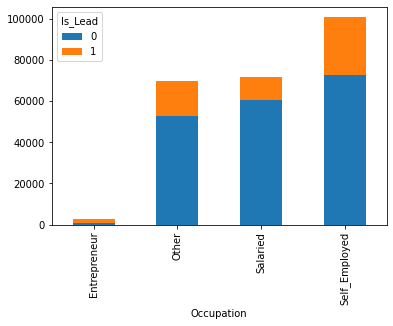

In [81]:
var = train.groupby(['Occupation','Is_Lead']).Is_Lead.count()
var.unstack().plot(kind='bar',stacked=True, grid=False);

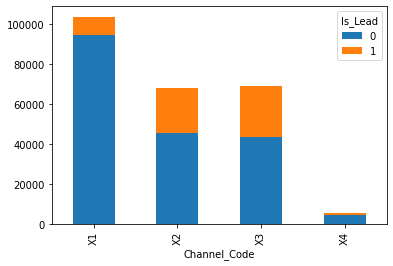

In [85]:
var = train.groupby(['Channel_Code','Is_Lead']).Is_Lead.count()
var.unstack().plot(kind='bar',stacked=True, grid=False);

Observation:
- It seems that when the acquisition Channel_Code is either X2 or X3 the customers are more likely to invest in the credit card. Whereas, for other acquisition channel types the interested customers number is not impressive

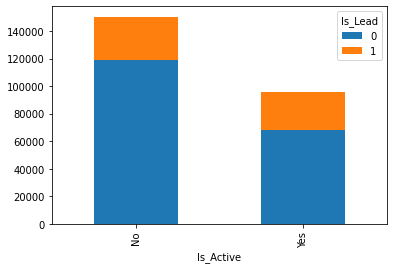

In [86]:
var = train.groupby(['Is_Active','Is_Lead']).Is_Lead.count()
var.unstack().plot(kind='bar',stacked=True, grid=False);

### Step 5: Building Model

In [92]:
train.select_dtypes(include='object').columns

Index([], dtype='object')

In [84]:
train.drop('ID',axis=1, inplace=True)

In [98]:
train.drop('Vintage_new',axis=1, inplace=True)

###### ApplyEncoding techniques to convert the categorical columns into numerical columns:
- Will apply onehot encoding for Gender, Is_Active, Credit_Product, Region
- Will apply label encoding on Occupation, Channel_Code

In [99]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

* __Encoding the required columns from training and test dataset__

In [100]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [101]:
# Seperate Features and Target
x = train.drop(columns = ['Is_Lead'], axis=1)
y = train['Is_Lead']

In [102]:
from sklearn.preprocessing import StandardScaler
x_scalar = StandardScaler()
X = x_scalar.fit_transform(x)

In [103]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22,stratify=y)

In [118]:
# necessary imports
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score

In [111]:
print('Sample Training Labels')
display(y_train.head())
print('Sample Test Labels')
display(y_valid.head())

Sample Training Labels


83051     0
137001    1
224860    0
49325     1
90365     0
Name: Is_Lead, dtype: int64

Sample Test Labels


108830    0
215065    0
84820     0
240088    1
216917    0
Name: Is_Lead, dtype: int64

#### Model Building:

In [119]:
# defining a method for calculating accuracy,search time, hyperparameters etc for different models
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

In [131]:
# method to return the loss and the different accuracies for LGB model
def lgb_objective(space, early_stopping_rounds=50):
    
    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']), 
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain']
    )
    
    lgbm.fit(X_train,y_train, 
            eval_set = [(X_valid, y_valid)],
            early_stopping_rounds = early_stopping_rounds,
            eval_metric = 'auc',
            verbose = False)
    
    predictions = lgbm.predict(X_valid)
    test_preds = lgbm.predict_proba(X_valid)[:,1]
    train_preds = lgbm.predict_proba(X_train)[:,1]
    
    train_auc = roc_auc_score(y_train, train_preds)
    test_auc = roc_auc_score(y_valid, test_preds)
    accuracy = accuracy_score(y_valid, predictions)  

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }


In [127]:

trials = Trials()
# defining parameters for LGB 
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

#  defining the hyper parameters
lgb_hyperparams = fmin(fn = lgb_objective, 
                 max_evals = 150, 
                 trials = trials,
                 algo = tpe.suggest,
                 space = space
                 )

lgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM') # calling the org_results function previously defined
display(lgb_results)

[LightGBM] [Warning] feature_fraction is set=0.9079453608290957, colsample_bytree=0.3550305259508927 will be ignored. Current value: feature_fraction=0.9079453608290957
[LightGBM] [Warning] feature_fraction is set=0.9361407921956741, colsample_bytree=0.639570164934276 will be ignored. Current value: feature_fraction=0.9361407921956741
[LightGBM] [Warning] feature_fraction is set=0.6461785980334116, colsample_bytree=0.9578547348420319 will be ignored. Current value: feature_fraction=0.6461785980334116
[LightGBM] [Warning] feature_fraction is set=0.8607334974590239, colsample_bytree=0.7633035084361119 will be ignored. Current value: feature_fraction=0.8607334974590239
[LightGBM] [Warning] feature_fraction is set=0.8709567420895747, colsample_bytree=0.7261702025372722 will be ignored. Current value: feature_fraction=0.8709567420895747
[LightGBM] [Warning] feature_fraction is set=0.7957169169621541, colsample_bytree=0.5734179511789239 will be ignored. Current value: feature_fraction=0.7957

[LightGBM] [Warning] feature_fraction is set=0.6135709258002477, colsample_bytree=0.9073452238648423 will be ignored. Current value: feature_fraction=0.6135709258002477
[LightGBM] [Warning] feature_fraction is set=0.7072705484017011, colsample_bytree=0.9402350916477289 will be ignored. Current value: feature_fraction=0.7072705484017011
[LightGBM] [Warning] feature_fraction is set=0.8013424596154636, colsample_bytree=0.8782131920590089 will be ignored. Current value: feature_fraction=0.8013424596154636
[LightGBM] [Warning] feature_fraction is set=0.4846786890734079, colsample_bytree=0.699945515714665 will be ignored. Current value: feature_fraction=0.4846786890734079
[LightGBM] [Warning] feature_fraction is set=0.5112716397917362, colsample_bytree=0.6844211712866818 will be ignored. Current value: feature_fraction=0.5112716397917362
[LightGBM] [Warning] feature_fraction is set=0.6707251335218649, colsample_bytree=0.3184831617538504 will be ignored. Current value: feature_fraction=0.6707

{'model': 'LightGBM',
 'parameter search time': '0:11:34.076000',
 'accuracy': 0.862,
 'test auc score': 0.876,
 'training auc score': 0.879,
 'parameters': {'colsample_bytree': 0.99858093874922,
  'feature_fraction': 0.656102976513275,
  'learning_rate': 0.03916060334412935,
  'max_depth': 7.0,
  'min_split_gain': 0.06958556792085792,
  'n_estimators': 775.0,
  'num_leaves': 35.0,
  'reg_alpha': 0.003765527880479236,
  'reg_lambda': 0.8621922133786086}}

#### Saving the Model separately:

In [137]:
# method to return the loss and the different accuracies for LGB model
lgbm = LGBMClassifier(
        learning_rate = 0.03916060334412935,
        n_estimators= 775, 
        max_depth = 7,
        num_leaves = 35,
        colsample_bytree = 0.99858093874922,
        feature_fraction = 0.656102976513275,
        reg_lambda = 0.8621922133786086,
        reg_alpha = 0.003765527880479236,
        min_split_gain = 0.06958556792085792)
    
lgbm.fit(X_train,y_train, 
        eval_set = [(X_valid, y_valid)],
        early_stopping_rounds = 50,
        eval_metric = 'auc',
        verbose = False)
    
predictions = lgbm.predict(X_valid)
test_preds = lgbm.predict_proba(X_valid)[:,1]
train_preds = lgbm.predict_proba(X_train)[:,1]
    
train_auc = roc_auc_score(y_train, train_preds)
test_auc = roc_auc_score(y_valid, test_preds)
accuracy = accuracy_score(y_valid, predictions)  

print('status', STATUS_OK, 'loss', 1-test_auc, 'accuracy', accuracy, 'test auc', test_auc, 'train auc', train_auc)


[LightGBM] [Warning] feature_fraction is set=0.656102976513275, colsample_bytree=0.99858093874922 will be ignored. Current value: feature_fraction=0.656102976513275
status ok loss 0.12410813194676962 accuracy 0.8618984637297792 test auc 0.8758918680532304 train auc 0.879103200030148


__Model Evaluation Results__

In [128]:
display(lgb_results)

{'model': 'LightGBM',
 'parameter search time': '0:11:34.076000',
 'accuracy': 0.862,
 'test auc score': 0.876,
 'training auc score': 0.879,
 'parameters': {'colsample_bytree': 0.99858093874922,
  'feature_fraction': 0.656102976513275,
  'learning_rate': 0.03916060334412935,
  'max_depth': 7.0,
  'min_split_gain': 0.06958556792085792,
  'n_estimators': 775.0,
  'num_leaves': 35.0,
  'reg_alpha': 0.003765527880479236,
  'reg_lambda': 0.8621922133786086}}

##### Make Predictions using the test dataset:

In [143]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')
test.drop('ID',axis=1, inplace=True)
final_predictions = lgbm.predict(test)
submission['Is_Lead'] = final_predictions
submission['Is_Lead'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Is_Lead, dtype: int64

In [144]:
submission['Is_Lead'].value_counts()

0    104236
1      1076
Name: Is_Lead, dtype: int64

##### Saving the submission file:

In [146]:
submission.to_csv('LGBM_submission1.csv', index=False)